<a href="https://colab.research.google.com/github/sipocz/Garbage_Classification/blob/main/Garbage_model_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Build Model
# Importáld a megfelelő rétegeket
from tensorflow.keras.layers import Input,Dense,Embedding,LSTM,TimeDistributed, Flatten, Bidirectional, Conv2D, Dropout,Convolution2D, Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, Rescaling,RandomFlip,RandomRotation, Reshape

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta,Adam,SGD
from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy, mean_squared_error
from tensorflow.keras import backend as K
from keras.regularizers import l1
from keras.initializers import RandomNormal,Zeros,GlorotUniform
K.clear_session()

Xmax=64
Ymax=48
bpc=1
flat=Xmax*Ymax*bpc
inputs= Input(shape=(Xmax,Ymax))

ll=RandomNormal()

# Encoder

x = Flatten()(inputs)

x = Dense(350,activation="linear",kernel_initializer=ll)(x)


#x = Dense(10,activation="elu",kernel_initializer='he_uniform')(x)


# Decoder
coded = Dense(151,activation="linear",kernel_initializer=ll, name="coded")(x)


#x = Dense(10,activation="elu",kernel_initializer='he_uniform')(coded)
x = Dense(350,activation="linear",kernel_initializer=ll)(coded)


x = Dense(flat,activation="linear",kernel_initializer=ll)(x)

x = Reshape((Xmax,Ymax,bpc))(x)


#x = Conv2DTranspose(3, (2, 2), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(inputs, x)






In [ ]:
modelurl="https://github.com/sipocz/Garbage_Classification/raw/cd7970e9e0423b0ab16db644f08c2408bcc0c19e/models/mod_0_0035.zip"
fname=modelurl.split("/")[-1]
modelname=fname.split(".")[0]+".h5"

In [ ]:
modelname

'mod_0_0035.h5'

In [ ]:
!wget $modelurl
!unzip $fname
!rm $fname

--2021-10-28 12:29:43--  https://github.com/sipocz/Garbage_Classification/raw/cd7970e9e0423b0ab16db644f08c2408bcc0c19e/models/mod_0_0035.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Garbage_Classification/cd7970e9e0423b0ab16db644f08c2408bcc0c19e/models/mod_0_0035.zip [following]
--2021-10-28 12:29:43--  https://raw.githubusercontent.com/sipocz/Garbage_Classification/cd7970e9e0423b0ab16db644f08c2408bcc0c19e/models/mod_0_0035.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24747746 (24M) [application/zip]
Saving to: ‘mod_0_0035.zip’

mod_0_0035.zip      100%[===================>]

In [ ]:
from keras.models import load_model
autoencoder=load_model(modelname)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 48)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 350)               1075550   
_________________________________________________________________
coded (Dense)                (None, 151)               53001     
_________________________________________________________________
dense_1 (Dense)              (None, 350)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 3072)              1078272   
_________________________________________________________________
reshape (Reshape)            (None, 64, 48, 1)         0     

In [ ]:
import tensorflow as tf
layer_coded=tf.keras.models.Model(inputs=autoencoder.inputs,outputs=autoencoder.get_layer(name="coded").output)


In [ ]:
fnames={
        'cardboard':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip',
        'glass':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/glass.zip',
        'metal':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/metal.zip',
        'paper':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/paper.zip',
        'plastic':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/plastic.zip',
        'trash':'https://github.com/sipocz/Garbage_Classification/raw/zip/trash.zip'
}


In [ ]:
def create_dir(fnames):
    for key in fnames:
        !mkdir graf
        dirname="./graf/"+key
        !mkdir $dirname
        allfile=dirname+"/*"
        !rm $allfile
        fname_url_tmp=fnames[key]
        fname=key+".zip"
        !wget $fname_url_tmp
        !cp $fname $dirname 
        
        !rm $fname
        zipname=dirname+"/"+key+".zip"
        print("dirname:",dirname)
        !unzip $zipname -d "./graf"
        #!rm $zipname  

In [ ]:
create_dir(fnames)

rm: cannot remove './graf/cardboard/*': No such file or directory
--2021-10-28 12:29:45--  https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Garbage_Classification/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip [following]
--2021-10-28 12:29:45--  https://raw.githubusercontent.com/sipocz/Garbage_Classification/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6093838 (5.8M) [application/zip]
Saving to: ‘cardboard.zip’

cardb

In [ ]:
def format_image(image_dir):
    image = tf.io.read_file(image_dir)
    image = tf.image.decode_jpeg(image, channels=1)
    #image = tf.image.convert_image_dtype(image,dtype=tf.int16)
    
    image = tf.image.resize_with_pad(image, 48, 64,)

    #print(image)
    return image

In [ ]:
f1="./graf/metal/010.jpg"

In [ ]:
imagex=format_image(f1)

In [ ]:
imagex=tf.image.rot90(imagex)

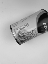

In [ ]:

from google.colab.patches import cv2_imshow
cv2_imshow(imagex.numpy())

In [ ]:
ii=imagex.numpy()

In [ ]:
ii=ii.reshape(-1,64,48)

In [ ]:
ii.shape

(1, 64, 48)

In [ ]:
oo=autoencoder.predict(ii)

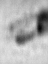

In [ ]:
cv2_imshow(oo[0])

In [ ]:
avektor=autoencoder.get_layer("coded").output

In [ ]:
klayer=autoencoder.get_layer(name="coded")

In [ ]:
p1=klayer.variables[1].numpy()

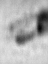

In [ ]:
cv2_imshow(oo[0])

In [ ]:
import numpy as np


In [ ]:
np.linalg.norm(p1)

0.6605025

In [ ]:
def cos_sim(a,b):
    from numpy import dot
    from numpy.linalg import norm

    cos_sim_calc = dot(a, b)/(norm(a)*norm(b))
    return(cos_sim_calc)

In [ ]:
def embed_vector(fname):
    from google.colab.patches import cv2_imshow
    
    imagex=format_image(fname)
    imagex=tf.image.rot90(imagex)
    
    cv2_imshow(imagex.numpy())
    ii=imagex.numpy()
    ii=ii.reshape(-1,64,48)
    ii.shape
    oo=autoencoder.predict(ii)
    cv2_imshow(oo[0])
    klayer=autoencoder.get_layer(name="coded")
    p1=klayer.variables[1].numpy()
    print(klayer.variables)
    return(p1)

In [312]:
def embed_vector(fname, show=True):

    from keras.models import Model

    model = autoencoder  # include here your original model

    layer_name = 'coded'
    intermediate_layer_model = Model(inputs=model.input,
                                    outputs=model.get_layer(layer_name).output)
    
    imagex=format_image(fname)
    imagex=tf.image.rot90(imagex)
    
    if show:
        cv2_imshow(imagex.numpy())
    ii=imagex.numpy()
    ii=ii.reshape(-1,64,48)
    ii.shape
    intermediate_output = intermediate_layer_model.predict(ii)
    return(intermediate_output)

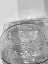

In [ ]:
f1="./graf/glass/003.jpg"
v1=embed_vector(f1)

In [ ]:
v1

array([[ 1.33777695e+01,  4.41408253e+00,  7.40366058e+01,
        -8.94529724e+01,  2.70078015e+00,  7.91652374e+01,
         1.63834998e+03,  5.84358826e+01,  8.43614960e+01,
        -4.87451897e+01,  2.58660450e+01,  1.25056360e+03,
         4.13684034e+00, -2.48536499e+02,  3.82735176e+01,
        -5.38435287e+01,  1.46290169e+01,  1.26984703e+02,
         5.12007904e+01,  1.47617111e+01, -5.56689491e+01,
        -7.31843114e-01,  2.49227352e+01,  4.68865013e+01,
        -1.58849001e+01,  8.15387344e+00,  7.66246719e+01,
         8.76041107e+01,  5.18927803e+01, -9.70474091e+01,
         4.46184448e+02,  8.37289963e+01,  1.22404320e+02,
        -1.42878052e+02,  6.08956795e+01, -9.43422604e+00,
         2.15477448e+02,  1.96158409e+01, -4.45140877e+01,
         8.73106079e+01, -3.36896820e+01, -2.61911416e+00,
        -9.92452240e+01, -1.20189880e+03,  4.14220238e+01,
         3.65958061e+01,  4.80543804e+00,  9.79745712e+01,
         1.30693741e+01,  6.21731148e+01, -1.26955467e+0

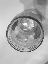

In [ ]:
f1="./graf/glass/006.jpg"
v2=embed_vector(f1)

In [ ]:
v2

array([[-9.71996994e+01,  1.80267181e+01, -2.16252213e+01,
        -2.42282410e+01,  1.30190353e+02, -9.45560760e+01,
         1.70057642e+03, -5.68700867e+01, -7.14435120e+01,
         1.30121170e+02, -3.62482452e+01,  1.43499219e+03,
        -1.04435028e+02,  2.12998337e+02, -6.59699097e+01,
         4.18109283e+01, -3.44571953e+01,  3.73292885e+01,
         1.22698112e+02, -9.24286118e+01, -1.96803253e+02,
         1.32243073e+02, -1.27631779e+01, -1.85731064e+02,
        -9.34818420e+01,  5.24380684e+01, -1.72404617e+02,
         4.91547966e+01, -3.91868401e+01, -1.93757801e+01,
         2.54015244e+02,  5.45255699e+01, -1.64252213e+02,
        -3.65328598e+01, -1.92265823e+02, -2.73988419e+01,
        -9.71088104e+01,  8.08278809e+01,  1.75359177e+02,
        -3.96700630e+01,  1.25374651e+01, -1.06367561e+02,
        -2.02536575e+02, -1.12880664e+03,  7.55549850e+01,
         9.07365570e+01,  3.73710418e+00, -1.98067093e+00,
        -1.26626816e+02,  4.88265724e+01, -7.49315948e+0

In [ ]:
a=cos_sim(v1[0],v2[0])

In [ ]:
print(a)

0.835147


In [ ]:
v1

array([-0.01617388, -0.04074385,  0.02647804, -0.06356775,  0.05527239,
       -0.01664942, -0.20480323, -0.00746086,  0.07918337,  0.02122765,
        0.02949703, -0.2061132 ,  0.04168667, -0.19079429,  0.02170891,
        0.0077674 , -0.00056115, -0.02153743, -0.01416178,  0.03729251,
        0.07988276, -0.02868762,  0.04306616,  0.01999498,  0.01501746,
       -0.02019855, -0.05602204,  0.06326584, -0.04122707, -0.03196999,
       -0.07851347, -0.00726858,  0.02565725,  0.04341713, -0.0117612 ,
        0.00438786, -0.0553862 , -0.00039095, -0.06515244,  0.03493994,
       -0.02323468, -0.03110135, -0.00574584,  0.18121706, -0.0306898 ,
        0.04795525,  0.03168374, -0.02562335,  0.0479435 , -0.04110156,
       -0.01000586, -0.00739306,  0.01633358,  0.00530232,  0.01445385,
        0.01962786,  0.00916066,  0.01131901, -0.06797021,  0.03030384,
       -0.0086622 ,  0.00786075,  0.02263473, -0.02868537,  0.03332118,
        0.02495165,  0.02574619, -0.01091522,  0.01272115, -0.17

In [ ]:
v2

array([-0.01617388, -0.04074385,  0.02647804, -0.06356775,  0.05527239,
       -0.01664942, -0.20480323, -0.00746086,  0.07918337,  0.02122765,
        0.02949703, -0.2061132 ,  0.04168667, -0.19079429,  0.02170891,
        0.0077674 , -0.00056115, -0.02153743, -0.01416178,  0.03729251,
        0.07988276, -0.02868762,  0.04306616,  0.01999498,  0.01501746,
       -0.02019855, -0.05602204,  0.06326584, -0.04122707, -0.03196999,
       -0.07851347, -0.00726858,  0.02565725,  0.04341713, -0.0117612 ,
        0.00438786, -0.0553862 , -0.00039095, -0.06515244,  0.03493994,
       -0.02323468, -0.03110135, -0.00574584,  0.18121706, -0.0306898 ,
        0.04795525,  0.03168374, -0.02562335,  0.0479435 , -0.04110156,
       -0.01000586, -0.00739306,  0.01633358,  0.00530232,  0.01445385,
        0.01962786,  0.00916066,  0.01131901, -0.06797021,  0.03030384,
       -0.0086622 ,  0.00786075,  0.02263473, -0.02868537,  0.03332118,
        0.02495165,  0.02574619, -0.01091522,  0.01272115, -0.17

In [ ]:
def getsimilarity(fname1,fname2):
    v1=embed_vector(fname1)
    v2=embed_vector(fname2)
    sim=cos_sim(v1[0],v2[0])
    return (sim)
    

In [ ]:
def files_of_dir(path):
    import os

   

    files = os.listdir(path)
    out=[path+"/"+file for file in files if "jpg" in file ]
    return out


In [ ]:
files_of_dir("./graf/glass")

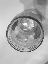

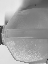

0.8670481

In [ ]:
f1="./graf/glass/006.jpg"
f2="./graf/plastic/004.jpg"

getsimilarity(f1,f2)

In [328]:
def get_dir_vektor(dir):
    fnamelist=files_of_dir(dir)
    count=0
    simsum=0
    maxsim=0
    v_items=[]
    for dirfname in fnamelist:
        v1=embed_vector(dirfname,show=False)
        v_items.append(v1)
        
    return(v_items)


In [314]:
def get_dir_similarity(dirname,fname,rate=0.8):
    fnamelist=files_of_dir(dirname)
    count=0
    simsum=0
    maxsim=0
    for dirfname in fnamelist:
        similar=getsimilarity(dirfname,fname)
        print(similar)
        if similar>0.75 and similar!=1:
            count+=1
            simsum=simsum+similar
            if similar>maxsim:
                maxsim=similar
            print(dirfname)
    return(count,maxsim,simsum,simsum/count)


In [ ]:
furl="https://github.com/sipocz/Garbage_Classification/raw/5b9dbccfb0e0942b62f5ca172c2be09825679912/TEST.zip"
!wget $furl
fname=furl.split("/")[-1]

!unzip $fname



In [446]:
glass_vektor=get_dir_vektor("./graf/glass")


In [447]:
cardboard_vektor=get_dir_vektor("./graf/cardboard")


In [448]:
metal_vektor=get_dir_vektor("./graf/metal")


In [449]:
paper_vektor=get_dir_vektor("./graf/paper")


In [450]:
plastic_vektor=get_dir_vektor("./graf/plastic")


In [451]:
trash_vektor=get_dir_vektor("./graf/trash")


In [452]:
train_vektor=get_dir_vektor("./TEST")

In [453]:
def get_max_distances(fname,vektor, limit=0.85):
    from numpy.linalg import norm 
    maxvec=0
    overlimits=0
    v1=embed_vector(fname,show=False)
    l1norm=1e99
    l2norm=1e99
    for vek in vektor:
        similarity=cos_sim(vek[0],v1[0])
        l2normdiff_akt=abs(norm(vek[0],2)-norm(v1[0],2))
        l1normdiff_akt=abs(norm(vek[0],1)-norm(v1[0],1))
        if l2norm>l2normdiff_akt:
            l2norm=l2normdiff_akt

        if l1norm>l1normdiff_akt:
            l1norm=l1normdiff_akt
            
        if similarity>maxvec:
            maxvec=similarity

        if similarity>limit:
            overlimits+=1
        
    return(maxvec,overlimits,l2norm,l1norm)


In [429]:
get_max_distances("./TEST/000.jpg",plastic_vektor)

(0.8899475, 62, 0.34643555, 22.660156)

In [438]:
def calculate(fname, limit=0.85):
    dic={0:"cardboard",1:"glass",2:"metal",3:"paper",4:"plastic",5:"trash"}
    out=[]
    numoflimits=[0,0,0,0,0,0]
    item_label=[cardboard_vektor,glass_vektor,metal_vektor,paper_vektor,plastic_vektor,trash_vektor]
    for i,vec in enumerate(item_label):
        cosdis,overlimits,l2norm,l1norm=get_max_distances(fname,vec)
        
        out.append(cosdis)
        numoflimits[i]=overlimits
        print(f"{i}. -- {dic[i]:10} -- cos:{cosdis:19:3} -- l2norm: {l2norm:18} -- l1norm: {l1norm:20} -- overlimits: {overlimits:3} ")
    maxi=max(out)
    maxpos=out.index(maxi)
    print("-"*12)
    print(f"{maxpos}. {dic[maxpos]}")


In [464]:
calculate("./TEST/105.jpg")

0. -- cardboard  -- cos:  0.849649965763092 -- l2norm:     3.415283203125 -- l1norm:           12.1484375 -- overlimits:   0 
1. -- glass      -- cos: 0.8626696467399597 -- l2norm:     1.062255859375 -- l1norm:          15.89453125 -- overlimits:   3 
2. -- metal      -- cos: 0.8597842454910278 -- l2norm:      0.17919921875 -- l1norm:            1.3359375 -- overlimits:   2 
3. -- paper      -- cos: 0.8687214255332947 -- l2norm:       0.9189453125 -- l1norm:           6.51953125 -- overlimits:   3 
4. -- plastic    -- cos: 0.8739656209945679 -- l2norm:     1.427978515625 -- l1norm:             21.84375 -- overlimits:  20 
5. -- trash      -- cos: 0.8604065179824829 -- l2norm:     2.995849609375 -- l1norm:          32.09765625 -- overlimits:   2 
------------
4. plastic


In [ ]:
get_dir_similarity("./graf/glass","./graf/cardboard/002.jpg",0.8)